# [Project 2] 전이학습

____________________

### 프로젝트 목표
- 매우 큰 데이터셋의 특징을 가지고 작은 데이터셋의 전이학습을 통해 성능을 끌어내는 모델 생성 


____________________

### 프로젝트 목차
1. __데이터 읽기__: 전이학습에 사용하고자하는 hymenoptera 데이터 확인<br>


2. __데이터 전 처리__: 딥러닝 모델에 필요한 입력값 형식으로 처리<br>
    2.1. 사용하는 데이터셋의 mean, std값을 사용하여 전처리<br>
    2.2. 데이터 train, valid 나누기<br>


3. __딥러닝 모델 학습__: resnet18 모델을 사용하여 전이 학습 수행<br>
    3.1. fc layer freeze<br>


4. __데이터 생성__: 학습된 모델을 바탕으로 평가 및 예측<br>
    4.1. 생성된 데이터 시각화<br>



____

## 프로젝트 개요

실제로 많은 상황에서 데이터 수집이 어려울 수 있습니다. 딥러닝 모델은 수백만 개의 파라미터를 조정해야 하기 때문에 대규모 데이터가 필요합니다. 하지만 전이학습을 사용하면 사전 훈련된 모델이 이미 다른 큰 데이터셋에서 학습된 지식을 활용하므로 적은 양의 데이터로도 효과적인 모델을 구축할 수 있습니다. 또한 이미 학습된 모델을 기반으로 작업을 시작할 수 있으므로 시간과 비용을 절감할 수 있고, 대규모 데이터셋에서 학습된 상태이기 때문에 일반적으로 높은 성능을 보여주는 경우가 많습니다.

이번 프로젝트에선 pytorch에서 제공하는 hymenoptera_data을 가지고 resnet18에 전이학습을 통해 분류 예측 성능이 높은지 알아봅시다.

____

# Download hymenoptera_data Dataset

In [3]:
import urllib.request
import zipfile
import os

# 다운로드할 파일 URL


# 저장할 로컬 파일명


# 파일 다운로드


# 압축 해제

# 압축 파일 삭제


In [4]:
# torch, torchvision, numpy, matplotlib, os, copy  등 필요 library를 import 하십시오. 


# Load hymenoptera_data Dataset

In [5]:
# train 데이터에는 RandomResizedCrop(224), RandomHorizontalFlip(), Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
# val 데이터에는 Resize(256), CenterCrop(224), Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
# 사용하여 ToTensor() 형태로 변환하는 transforms을 딕셔너리 만드십시오.



In [6]:
# hymenoptera_data 경로를 설정하십시오.
# datasets.ImageFolder(os.path.join(), data_transforms[])를 사용하여 hymenoptera_data의 train, val 데이터를 생성하십시오.
# batch, num_workers는 4로 하고 shuffle=True로 하여 train, val 데이터를 가져오십시오.
# train, val 데이터 크기를 생성하십시오.
# 시각화를 하기 위해 train 데이터의 class를 생성하십시오. 



# hymenoptera_data Dataset 학습 데이터 시각화

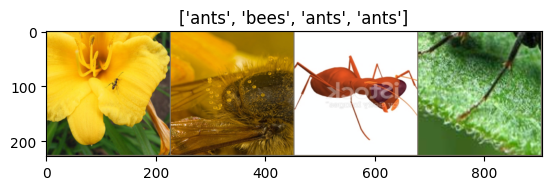

In [7]:
# 학습 데이터 시각화를 위해 img=inp.num# Load hymenoptera_data Datasetpy().transpose((1, 2, 0)) 값과, mean, std 값을 가져와서 std * img + mean을 완성하고 
# np.clip을 사용하여 이미지가 0,1 사이에 있게 한 후, 이미지와 title을 시각화 함수를 생성 하십시오.
# next(iter()) 를 사용하여 dataloaders['train'] 의 이미지 값과 클래스 명을 호출 하십시오.
# torchvision.utils.make_grid()를 사용하여 무작위로 선택된 이미지들을 그리드 형태로 배열하여 하나의 이미지로 합치십시오.
# 함수를 사용하여 시각화 하십시오.



# 학습 모델 생성

In [8]:
# input으로 model, loss function, opitmizer, scheduler, epochs을 받는 함수를 구성하십시오.
# copy.deepcopy(model.state_dict())를 사용하여 가장 높은 정확도를 달성한 경우 모델 가중치를 복사하여 저장하십시오.
# train, val에 따라 model.train(), model.eval()을 사용하십시오.
# dataloaders['train'], dataloaders['val']을 사용하여 이미지 값과 클래스명을 inputs.to('cpu')로 생성하십시오.
# optimizer.zero_grad()를 사용하여 초기화 하십시오.
# with torch.set_grad_enabled() 사용하여 순전파는 torch.max()를 통해 계산하고 선언한 loss function을 통해 loss를 구하십시오.
# 역전파로 train일때 그래디언트를 계속하도록 활성화 하십시오.
#  loss.item()을 사용하여 현재 미니배치에서의 손실 값을 가져온 뒤, 
# 미니배치의 크기 inputs.size(0)와 곱하여 running_loss에 누적 함으로써 전체 데이터셋에 대한 총 손실값을 계산하십시오.
# epoch loss 와 epch 계산된 평군 저항과 평균 손실을 구하십시오



# 검증 모델 생성

In [9]:
# was_training = model.training를 사용하여 현재 모델의 학습 모드를 저장하십시오.
# model.eval()을 사용하여 모델을 평가 모드로 전환하십시오.
# images_so_far = 0: 시각화한 이미지의 수를 저장하는 변수입니다.
# with torch.no_grad() 예측 과정에서 그래디언트를 계산하지 않도록 사용하고, 
# dataloaders['val'] 검증 데이터로부터 미니배치를 순회하면서 예측 결과를 시각화하십시오.
# inputs = inputs.to(device), labels = labels.to(device) 학습할 때와 마찬가지로 디바이스를  이동하십시오.
# _, preds = torch.max(outputs, 1): torch.max() 함수를 사용하여 예측된 클래스를 구하십시오.
# for j in range(inputs.size()[0]):: 미니배치의 각 샘플에 대해 반복하면서 예측 결과를 시각화하고, 함수를 호출하기 전의 모델의 상태로 되돌리십시오.


# 전이학습 준비

In [10]:
# device ='cpu'를 사용하십시오
# model을 resnet18에 pretrained=True를 사용하여 생성하십시오.
# 다운받은 resnet18 model의 network를 print하고
# fc 레이어를 제외한 나머지 모든 parameter를 동결하세요.




C:\python\lesson\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\python\lesson\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv1.weight: requires_grad=False
bn1.weight: requires_grad=False
bn1.bias: requires_grad=False
layer1.0.conv1.weight: requires_grad=False
layer1.0.bn1.weight: requires_grad=False
layer1.0.bn1.bias: requires_grad=False
layer1.0.conv2.weight: requires_grad=False
layer1.0.bn2.weight: requires_grad=False
layer1.0.bn2.bias: requires_grad=False
layer1.1.conv1.weight: requires_grad=False
layer1.1.bn1.weight: requires_grad=False
layer1.1.bn1.bias: requires_grad=False
layer1.1.conv2.weight: requires_grad=False
layer1.1.bn2.weight: requires_grad=False
layer1.1.bn2.bias: requires_grad=False
layer2.0.conv1.weight: requires_grad=False
layer2.0.bn1.weight: requires_grad=False
layer2.0.bn1.bias: requires_grad=False
layer2.0.conv2.weight: requires_grad=False
layer2.0.bn2.weight: requires_grad=False
layer2.0.bn2.bias: requires_grad=False
layer2.0.downsample.0.weight: requires_grad=False
layer2.0.downsample.1.weight: requires_grad=False
layer2.0.downsample.1.bias: requires_grad=False
layer2.1.conv1.wei

# 손실함수, optimizer, 스케줄러를 생성하십시오.

In [11]:
# nn.CrossEntropyLoss()로 손실 함수를 사용하십시오.
# optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)로 모든 파라미터를 최적화하는 SGD 옵티마이저를 생성하고 
# lr은 0.001로 설정되고, momentum은 0.9로 설정하십시오
# lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)로 학습률을 7 에폭마다 0.1씩 감소시키는 스케줄러를 생성하십시오.



# 학습 진행

In [12]:
# 위에서 생성한 학습 함수에 input값을 넣고 학습을 진행하십시오.


Epoch 0/24
----------
train Loss: 0.5969 Acc: 0.6926
val Loss: 0.3166 Acc: 0.8693

Epoch 1/24
----------
train Loss: 0.4235 Acc: 0.8156
val Loss: 0.3513 Acc: 0.8235

Epoch 2/24
----------
train Loss: 0.4267 Acc: 0.7951
val Loss: 0.4032 Acc: 0.8301

Epoch 3/24
----------
train Loss: 0.4072 Acc: 0.8033
val Loss: 0.1868 Acc: 0.9542

Epoch 4/24
----------
train Loss: 0.3609 Acc: 0.8197
val Loss: 0.1868 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.3620 Acc: 0.8484
val Loss: 0.1999 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.4126 Acc: 0.8238
val Loss: 0.1888 Acc: 0.9477

Epoch 7/24
----------
train Loss: 0.2577 Acc: 0.8975
val Loss: 0.1955 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.2823 Acc: 0.8730
val Loss: 0.2145 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.2996 Acc: 0.8566
val Loss: 0.2192 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3359 Acc: 0.8361
val Loss: 0.1958 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3456 Acc: 0.8156
val Loss: 0.2054 Acc: 0.9346

Ep

# 검증 시각화 진행

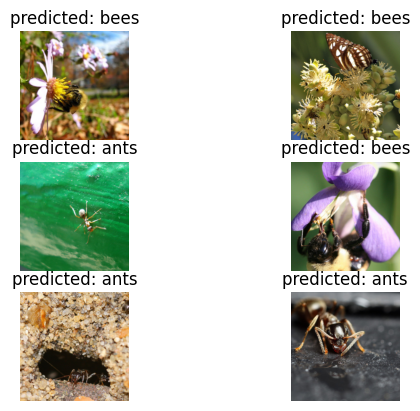

In [13]:
# 위에서 생성한 검증 함수에 input값을 넣고 검증 시각화를 진행하십시오.
